# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [11]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bryantdure/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")


In [16]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [19]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")





Total articles about Bitcoin: 7988


In [23]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 2264


In [24]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
    
# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
bitcoin_df = bitcoin_df[cols]
    
# Drop "Date" column
bitcoin_df = bitcoin_df.drop(columns=['date'])
bitcoin_df.head()


,compound,negative,neutral,positive,text
0,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
1,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...
2,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...
3,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
4,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...


In [25]:
# Create the Ethereum sentiment scores DataFrame

# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
    
# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text", "date"]
ethereum_df = ethereum_df[cols]
    
# Drop "Date" column
ethereum_df = ethereum_df.drop(columns=['date'])
ethereum_df.head()

,compound,negative,neutral,positive,text
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
2,-0.4019,0.080,0.920,0.000,"Move fast, break things, get hacked.\r\nThat’s..."
3,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...
4,0.4767,0.000,0.916,0.084,OpenSea has been one of a handful of NFT marke...


In [26]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,compound,negative,neutral,positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.097271,0.023616,0.917980,0.048323
std,0.324745,0.054342,0.128593,0.064479
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.872000,0.000000
50%,0.000000,0.000000,0.950000,0.000000
75%,0.304650,0.000000,1.000000,0.079000
max,0.908000,0.326000,1.000000,0.340000


In [27]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.190316,0.025202,0.905479,0.069309
std,0.408477,0.053650,0.080546,0.070791
min,-0.910000,0.000000,0.664000,0.000000
25%,0.000000,0.000000,0.860000,0.000000
50%,0.190100,0.000000,0.917500,0.064500
75%,0.489600,0.021750,1.000000,0.111500
max,0.877900,0.299000,1.000000,0.251000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest positive mean score with 0.069309.

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score, at 0.5859 .

Q. Which coin had the highest positive score?

A: Bitcoin with 0.127.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [65]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bryantdure/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [66]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary


In [69]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)
    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Create a tokenized list of the words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union('sw_addons')]
    
    return tokens

In [70]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)


In [71]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
2,-0.4019,0.080,0.920,0.000,"Move fast, break things, get hacked.\r\nThat’s...","[move, fast, break, thing, get, hackedthats, h..."
3,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...,"[heres, everything, need, know, nonfungible, t..."
4,0.4767,0.000,0.916,0.084,OpenSea has been one of a handful of NFT marke...,"[opensea, ha, one, handful, nft, marketplace, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [72]:
from collections import Counter
from nltk import ngrams

In [73]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text = ''.join(bitcoin_df.text)
bitcoin_processed = tokenizer(bitcoin_text)
bitcoin_ngrams = Counter(ngrams(bitcoin_processed, n=2))
print(dict(bitcoin_ngrams.most_common(10)))

{('charsby', 'reuters'): 31, ('reuters', 'stafffile'): 19, ('stafffile', 'photo'): 19, ('virtual', 'currency'): 18, ('illustration', 'taken'): 18, ('currency', 'bitcoin'): 12, ('photo', 'representation'): 11, ('picture', 'illustration'): 9, ('representation', 'virtual'): 9, ('charsmarch', 'min'): 8}


In [74]:
# Generate the Ethereum N-grams where N=2
ethereum_text = ''.join(ethereum_df.text)
ethereum_processed = tokenizer(ethereum_text)
ethereum_ngrams = Counter(ngrams(ethereum_processed, n=2))
print(dict(ethereum_ngrams.most_common(10)))

{('nonfungible', 'token'): 10, ('graphic', 'card'): 7, ('charsby', 'reuters'): 5, ('kings', 'leon'): 4, ('reuters', 'stafffile'): 4, ('stafffile', 'photo'): 4, ('geforce', 'rtx'): 4, ('expressed', 'entrepreneur'): 4, ('entrepreneur', 'contributor'): 4, ('token', 'nfts'): 4}


In [75]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [76]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10 = token_count(bitcoin_processed)
bitcoin_top10

[('bitcoin', 68), ('reuters', 64), ('charsby', 31)]

In [77]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top10 = token_count(ethereum_processed)
ethereum_top10

[('cryptocurrency', 24), ('bitcoin', 23), ('digital', 20)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

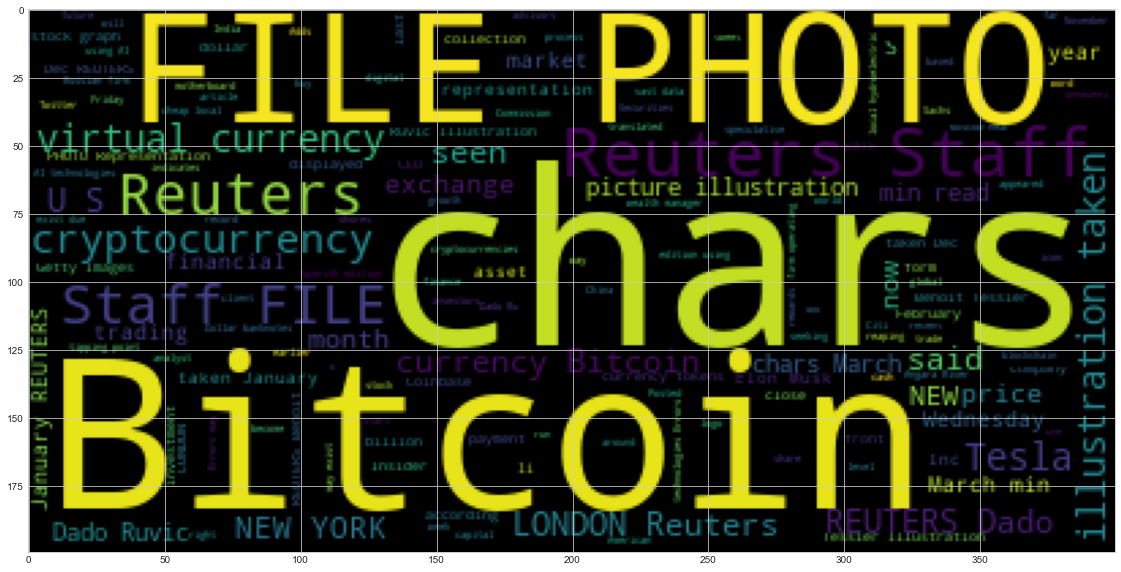

In [79]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

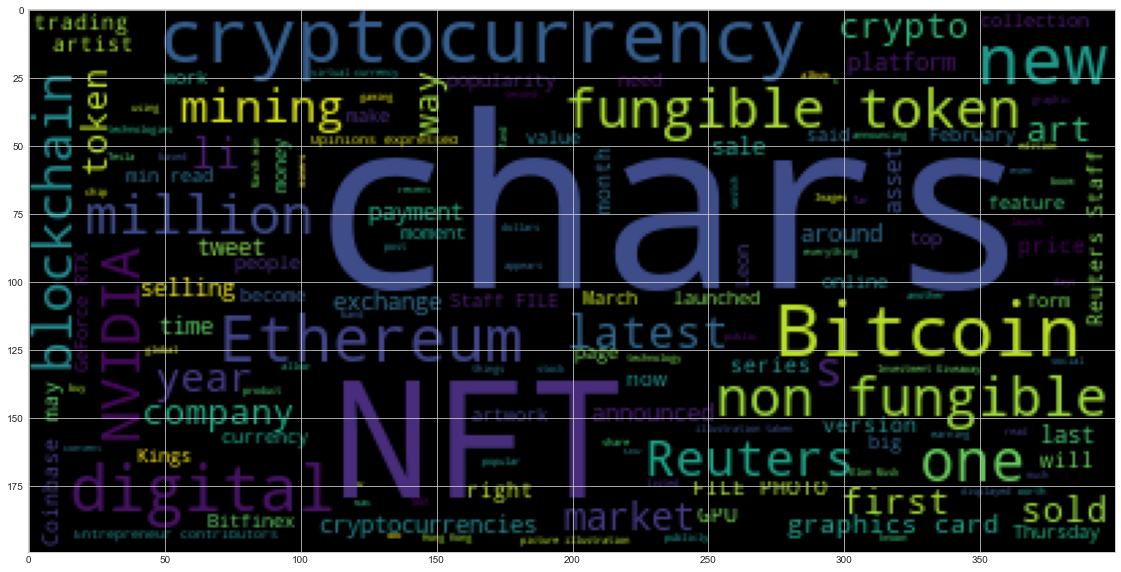

In [80]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [81]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [82]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [83]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ''.join(bitcoin_df.text)
bitcoin_text

'As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars]Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker

In [84]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)
# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [86]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [87]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text + '' + ent.label_)

earlier this yearDATE
TeslaORG
BitcoinPERSON
TeslaORG
Elon MuskPERSON
MuskPERSON
TeslaORG
TeslaORG
BitcoinPERSON
Elon MuskPERSON
WednesdayDATE
earlier this yearDATE
roughly $1.5 billionMONEY
early FebruaryDATE
SECORG
PhotoPERSON
Michele DoyingPERSON
IndiaGPE
ReutersORG
last yearsDATE
TwitterPRODUCT
Graham Ivan ClarkPERSON
TwittersNORP
CoinbaseNORP
San FranciscoGPE
last yearDATE
ThursdayDATE
over $12,000MONEY
IndiaGPE
ReutersORG
CoinbaseWORK_OF_ART
AmericanNORP
ReutersORG
Dec. 8, 2017DATE
Benoit Tessier/IllustrationORG
ReutersORG
ReutersORG
BitcoinPERSON
January 21, 2021DATE
ReutersORG
ReutersORG
PristinaGPE
KosovoGPE
June 12, 2018DATE
HONG KONGGPE
Reuters BreakingviewsORG
23, 2021DATE
SpanishNORP
AIORG
BitcoinPERSON
week of FebruaryDATE
North AmericanNORP
ReutersORG
BitcoinPERSON
U.S.GPE
January 8, 2021DATE
Dado RuPERSON
ReutersORG
BitcoinPERSON
U.S.GPE
January 27, 2020DATE
KTS Design/Science Photo Library/Getty ImagesORG
The Chicago Board Options ExchangeORG
the US Securities and Exch

---

### Ethereum NER

In [88]:
# Concatenate all of the Ethereum text together
ethereum_text = ''.join(ethereum_df.text)
ethereum_text

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new star

In [89]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)
# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [91]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [92]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + '' + ent.label_)

OneCARDINAL
PhotoPERSON
Michele DoyingPERSON
IndiaGPE
ReutersORG
ChristiesORG
firstORDINAL
$69 millionMONEY
5,000CARDINAL
EthereumORG
here.)OpenSeaGPE
NFTORG
recent weeksDATE
these daysDATE
KingsPERSON
NBAORG
millionsCARDINAL
EthereumORG
chars]MetaMaskORG
oneCARDINAL
EthereumORG
September 2020DATE
about $5.7 millionMONEY
CoinbaseNORP
San FranciscoGPE
last yearDATE
ThursdayDATE
BitfinexORG
BitfinexORG
millions of dollarsMONEY
ReutersORG
MeituORG
Hong KongGPE
ChinaGPE
March 24, 2017DATE
Bobby YipPERSON
HONG KONGGPE
ReutersORG
Hong KoPERSON
over $12,000MONEY
ReutersORG
BUCHARESTPERSON
ReutersORG
this monthDATE
IndiaGPE
ReutersORG
KingsORG
LeonPRODUCT
more than $2 millionMONEY
Getty ImagesPERSON
TwoCARDINAL
EthereumPERSON
Grayscale InvestmentsORG
WednesdayDATE
fiveCARDINAL
13CARDINAL
The Blockchain Certification Advanced Training BundleORG
20.60MONEY
as of Feb. 25DATE
96%PERCENT
ReutersORG
BitcoinPERSON
April 24, 2020DATE
ReutersORG
Dec. 8, 2017DATE
Benoit Tessier/IllustrationORG
ReutersOR

---